In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split as tts

In [2]:
x = load_iris().data
y = load_iris().target

x_train, x_test, y_train, y_test = tts(x, y, test_size=0.25)

In [3]:
model = Sequential([
    Dense(8, input_dim = x.shape[1], activation='relu'),
    Dense(3, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, batch_size=20, verbose=0)

In [11]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
fname_enc = encode.fit_transform(load_iris().feature_names)
fname_dec = encode.inverse_transform(fname_enc)

The figure layout has changed to tight
The figure layout has changed to tight


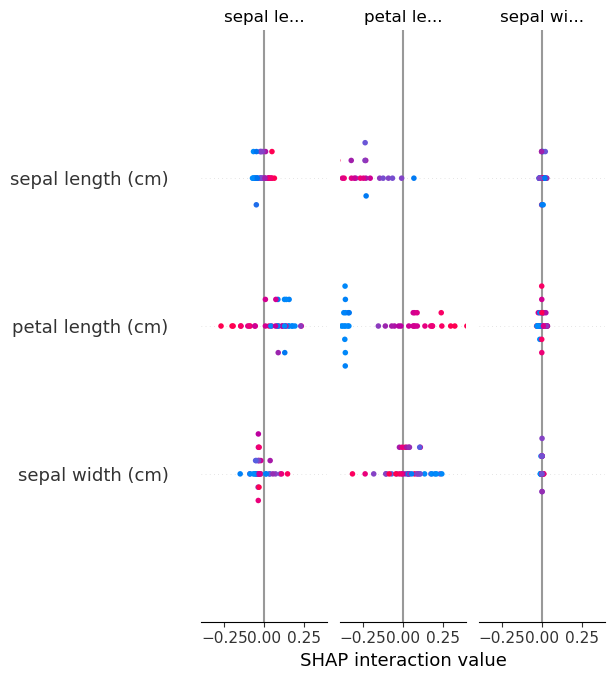

In [12]:
import shap
from shap import Explainer
explain = Explainer(model, x_train)
val = explain(x_test)
shap.summary_plot(val, x_test, feature_names=fname_dec)